## Data Dictionary

## products
| Column Name     | Data Type | Description                                    |
|-----------------|-----------|------------------------------------------------|
| ProductName     | String    | Name of the product                            |
| SupplierID      | Integer   | Unique identifier for the supplier             |
| CategoryID      | Integer   | Unique identifier for the category             |
| QuantityPerUnit | String    | Quantity of the product per unit               |
| UnitPrice       | Float     | Price per unit of the product                  |
| UnitsInStock    | Integer   | Number of units currently in stock             |
| UnitsOnOrder    | Integer   | Number of units currently on order             |
| ReorderLevel    | Integer   | Minimum number of units before reorder         |
| Discontinued    | Boolean   | Indicates if the product is discontinued (TRUE/FALSE) |

### categories
| Column Name  | Data Type | Description                                    |
|--------------|-----------|------------------------------------------------|
| CategoryName | String    | Name of the category                           |
| Description  | String    | Description of the category                    |

### orders
| Column Name    | Data Type | Description                                    |
|----------------|-----------|------------------------------------------------|
| OrderID        | Integer   | Unique identifier for the order                |
| CustomerID     | String    | Unique identifier for the customer             |
| EmployeeID     | Integer   | Unique identifier for the employee             |
| OrderDate      | Date      | Date when the order was placed                 |
| RequiredDate   | Date      | Date by which the order is required            |
| ShippedDate    | Date      | Date when the order was shipped                |
| ShipVia        | Integer   | Shipping method identifier                     |
| Freight        | Float     | Freight cost for the order                     |
| ShipName       | String    | Name of the shipper                            |
| ShipAddress    | String    | Shipping address                               |
| ShipCity       | String    | Shipping city                                  |
| ShipRegion     | String    | Shipping region                                |
| ShipPostalCode | String    | Shipping postal code                           |
| ShipCountry    | String    | Shipping country                               |

### order_details
| Column Name | Data Type | Description                                    |
|-------------|-----------|------------------------------------------------|
| OrderID     | Integer   | Unique identifier for the order                |
| ProductID   | Integer   | Unique identifier for the product              |
| UnitPrice   | Float     | Price per unit of the product at the time of the order |
| Quantity    | Integer   | Quantity of the product ordered                |
| Discount    | Float     | Discount applied to the product                |


### locations
| Column Name   | Data Type | Description                                      |
|---------------|-----------|--------------------------------------------------|
| CustomerID    | String    | Unique identifier for the customer               |
| Country       | String    | Country where the customer is located            |




In [1]:

# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Arial'  
import seaborn as sns
plt.style.use('ggplot')
# import ipywidgets as widgets
# from ipywidgets import interact, HBox, Layout
from IPython.display import display


In [2]:
# Set the display format for float numbers to 2 decimal places 
pd.options.display.float_format = '{:.2f}'.format

In [14]:
products_cols = ["ProductID","ProductName","CategoryID","UndiscountedUnitPrice","UnitsInStock","UnitsOnOrder","ReorderLevel","Discontinued"]
categories_cols = ["CategoryID","CategoryName"]
orders_cols = ["OrderID","CustomerID","OrderDate","ShipCountry"]

products = pd.read_csv("../data/products.csv", usecols=products_cols, encoding='latin1')
categories = pd.read_csv("../data/categories.csv", usecols=categories_cols, encoding='latin1')
orders = pd.read_csv("../data/orders.csv", usecols=orders_cols)
order_details = pd.read_csv("../data/order_details.csv")
locations = pd.read_csv("../data/customers.csv",usecols=['CustomerID', 'Country'])



In [15]:
display(products.head(3), categories.head(3), orders.head(3), order_details.head(3), locations.head(3))

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,17,Alice Mutton,6,$39.00,0,0,0,1
1,3,Aniseed Syrup,2,$10.00,13,70,25,0
2,40,Boston Crab Meat,8,$18.40,123,0,30,0


,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections


,OrderID,CustomerID,OrderDate,ShipCountry
0,10389,BOTTM,1995-01-20,Canada
1,10390,ERNSH,1995-01-23,Austria
2,10391,DRACD,1995-01-23,Germany


,OrderID,ProductID,DiscountedUnitPrice,Quantity
0,10248,11,14.00,12
1,10248,42,9.80,10
2,10248,72,34.80,5


,CustomerID,Country
0,ALFLI,Germany
1,ANATR,Mexico
2,ANTON,Mexico


In [16]:
display(products.info(),categories.info(),orders.info(),order_details.info(), locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductID              77 non-null     int64 
 1   ProductName            77 non-null     object
 2   CategoryID             77 non-null     int64 
 3   UndiscountedUnitPrice  77 non-null     object
 4   UnitsInStock           77 non-null     int64 
 5   UnitsOnOrder           77 non-null     int64 
 6   ReorderLevel           77 non-null     int64 
 7   Discontinued           77 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
<class 'pandas.

None

None

None

None

None

## Data Preparation

### Cleaning Data

In [17]:
products["UndiscountedUnitPrice"] = products["UndiscountedUnitPrice"].str.replace("$","").astype("float64")

orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

### Merging the Dataframes

In [18]:
# display(orders.head(), order_details.head())
orders_sales = pd.merge(orders, order_details, on="OrderID")
orders_sales.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60


In [19]:
orders_sales_locations = pd.merge(orders_sales, locations, on="CustomerID")
orders_sales_locations = orders_sales_locations.rename({'Country':"OrderCountry"}, axis=1)
orders_sales_locations.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity,OrderCountry
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20,Canada
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30,Canada
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60,Austria


In [20]:
sum(orders_sales_locations.ShipCountry != orders_sales_locations.OrderCountry)

0

In [21]:
# since ALL shipping coutries is the same as the order countries, I will drop one of the column
orders_sales_locations = orders_sales_locations.drop("ShipCountry", axis=1).rename({"OrderCountry":"Country"},axis=1)
orders_sales_locations.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada


In [22]:
products_with_categories = pd.merge(products, categories, on="CategoryID")
products_with_categories.head()

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,17,Alice Mutton,6,39.00,0,0,0,1,Meat/Poultry
1,3,Aniseed Syrup,2,10.00,13,70,25,0,Condiments
2,40,Boston Crab Meat,8,18.40,123,0,30,0,Seafood
3,60,Camembert Pierrot,4,34.00,19,0,0,0,Dairy Products
4,18,Carnarvon Tigers,8,62.50,42,0,0,0,Seafood


In [23]:
sum(products_with_categories.ProductID.duplicated())

0

In [24]:
products_analysis = pd.merge(orders_sales_locations, products_with_categories, on = "ProductID")
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,Pâté chinois,6,24.00,115,0,20,0,Meat/Poultry
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections


In [25]:
products_analysis["Revenue"] = products_analysis["DiscountedUnitPrice"]*products_analysis["Quantity"]
products_analysis["Discount"] = products_analysis["UndiscountedUnitPrice"]-products_analysis["DiscountedUnitPrice"]
products_analysis["%Discount"] = (products_analysis["Discount"]/products_analysis["UndiscountedUnitPrice"])*100
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,Revenue,Discount,%Discount
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood,396.80,6.20,20.00
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,Pâté chinois,6,24.00,115,0,20,0,Meat/Poultry,288.00,4.80,20.00
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections,788.00,9.90,20.08


In [ ]:
# Example: Replace non-standard characters
products_analysis['ProductName'] = products_analysis['ProductName'].str.replace('\x9f', '')



____________________

## Analysis


### Categories by Total Revenue and Total Quantity

### Objectives
- Compare the total revenue and total quantity sold across different product categories.
- Identify the top-performing categories based on total revenue and sales volume.

### Benefits of this Analysis Task
- Provides a clear understanding of category performance.
- Helps in making informed decisions related to inventory management and marketing strategies.
- Identifies opportunities for growth and improvement in specific categories.




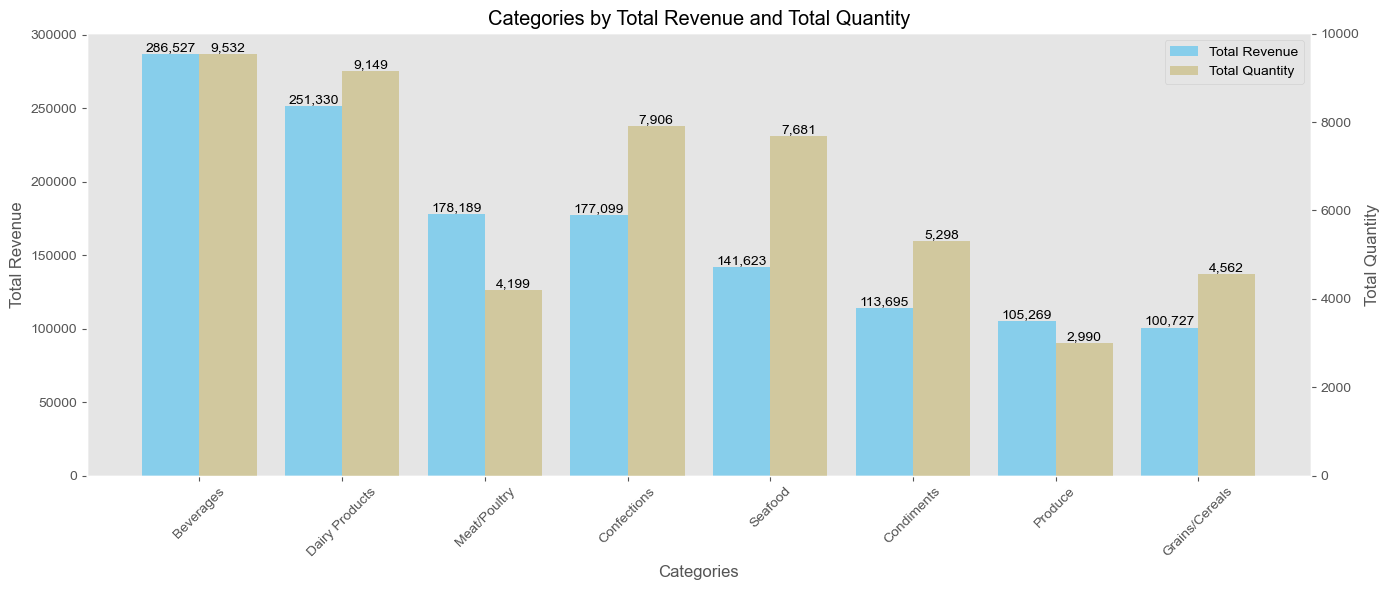

In [28]:
# Group by CategoryName and sum both TotalSales and Quantity
categories_rev_qty = (products_analysis.groupby('CategoryName')[['Revenue', 'Quantity']].sum()
                .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                .reset_index()
                .sort_values("Total Revenue", ascending=False)
)

# Define positions for the clustered bars
bar_width = 0.4
index = np.arange(len(categories_rev_qty['CategoryName']))

# Plot sales performance
fig, ax1 = plt.subplots(figsize=(14, 6))

# Main y-axis (left) for TotalSales
bars1 = ax1.bar(index - bar_width/2, categories_rev_qty['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')

# Add values on top of the bars for TotalSales
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Categories by Total Revenue and Total Quantity')
ax1.set_xticks(index)
ax1.set_xticklabels(categories_rev_qty['CategoryName'], rotation=45)

# Remove grid lines
ax1.grid(False)

# Secondary y-axis (right) for Quantity
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, categories_rev_qty['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

# Add values on top of the bars for Quantity
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax2.set_ylabel('Total Quantity')

# Remove grid lines
ax2.grid(False)

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


### Insights and Recommendations for Business Decision-Making

#### Insights
- **Beverages:** Highest total revenue at 286,527 and a total quantity of 9,532.
- **Dairy Products:** Significant total revenue of 251,330 and a total quantity of 9,149.
- **Meat/Poultry, Confections, and Seafood:** Strong revenue figures but varying in quantity.
- **Produce:** Lowest total revenue at 100,727 and a total quantity of 2,990.
- **Grains/Cereals:** Total revenue of 100,727 and a total quantity of 4,562.

#### Recommendations
- **Focus on Beverages and Dairy Products:** These categories are the most profitable and should be prioritized in marketing and inventory efforts.
- **Improve Marketing for Low Revenue Categories:** Consider targeted marketing campaigns for categories like Produce to boost their revenue.
- **Evaluate Quantity vs. Revenue:** Analyze if high-quantity categories with lower revenue can be optimized for better profitability.

__________________


### Top 10 Overall Products by Revenue
__Objective__:
To identify the top products contributing the most to total revenue, and to establish benchmarks for product performance in terms of revenue.

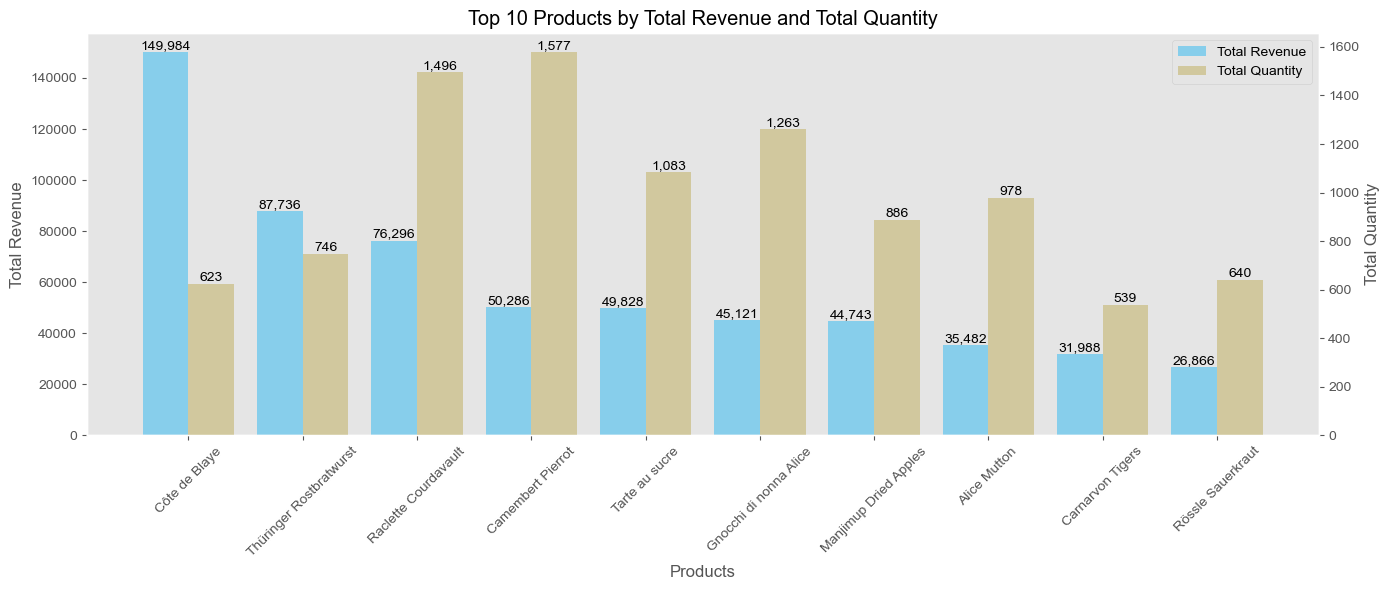

In [29]:


# Group by ProductName and sum both TotalSales and Quantity
top_products = (products_analysis.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                .reset_index()
                .sort_values("Total Revenue", ascending=False)
                .head(10)
)

# Define positions for the clustered bars
bar_width = 0.4
index = np.arange(len(top_products['ProductName']))

# Plot sales performance
fig, ax1 = plt.subplots(figsize=(14, 6))

# Main y-axis (left) for TotalSales
bars1 = ax1.bar(index - bar_width/2, top_products['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')

# Add values on top of the bars for TotalSales
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax1.set_xlabel('Products')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Top 10 Products by Total Revenue and Total Quantity')
ax1.set_xticks(index)
ax1.set_xticklabels(top_products['ProductName'], rotation=45)

# Remove grid lines
ax1.grid(False)

# Secondary y-axis (right) for Quantity
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, top_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

# Add values on top of the bars for Quantity
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax2.set_ylabel('Total Quantity')

# Remove grid lines
ax2.grid(False)

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


_________________________


### Top 10 Products by Revenue for each Category

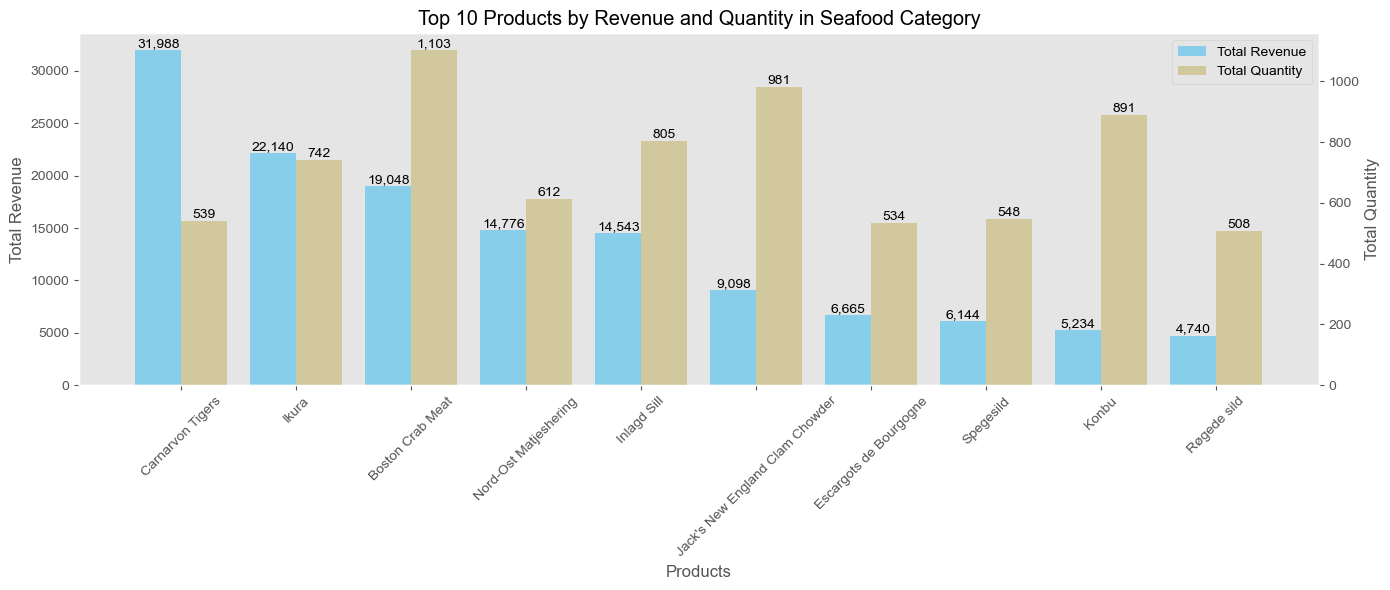

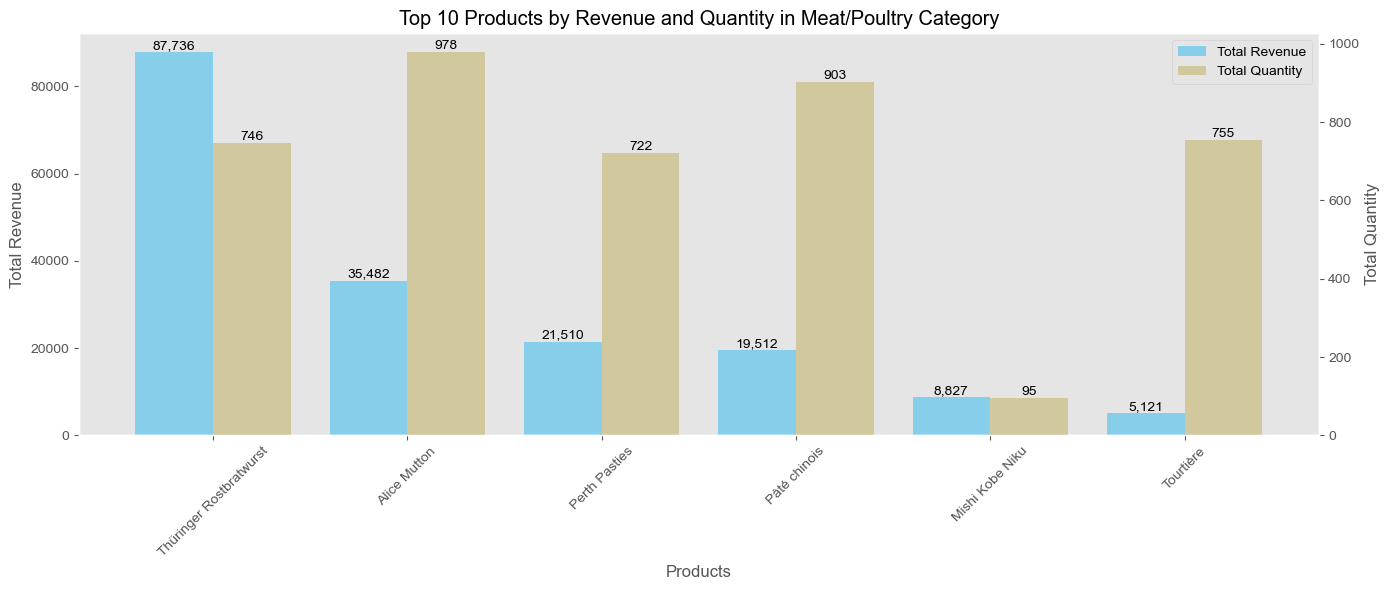

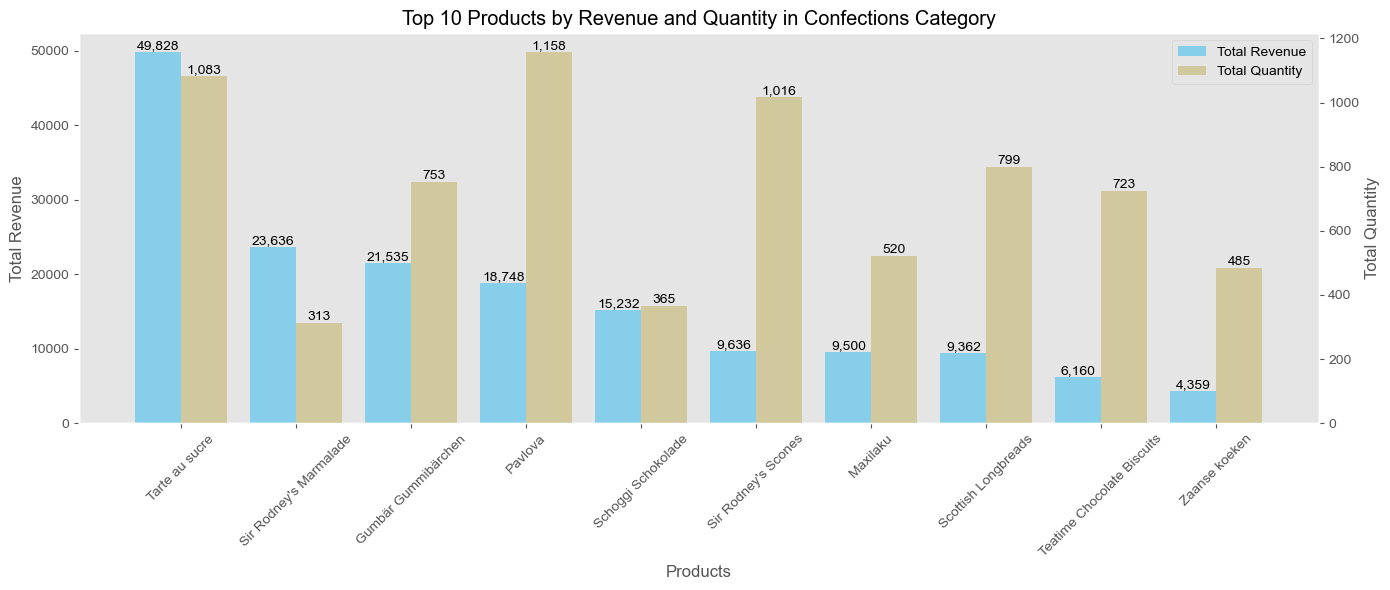

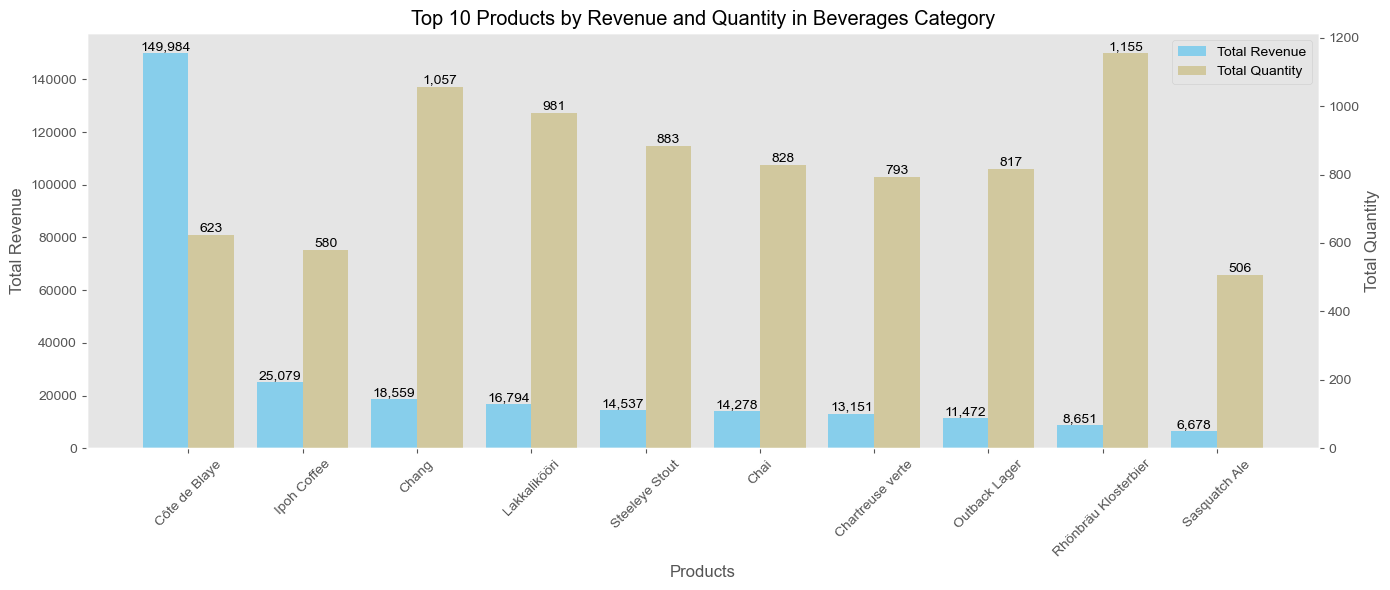

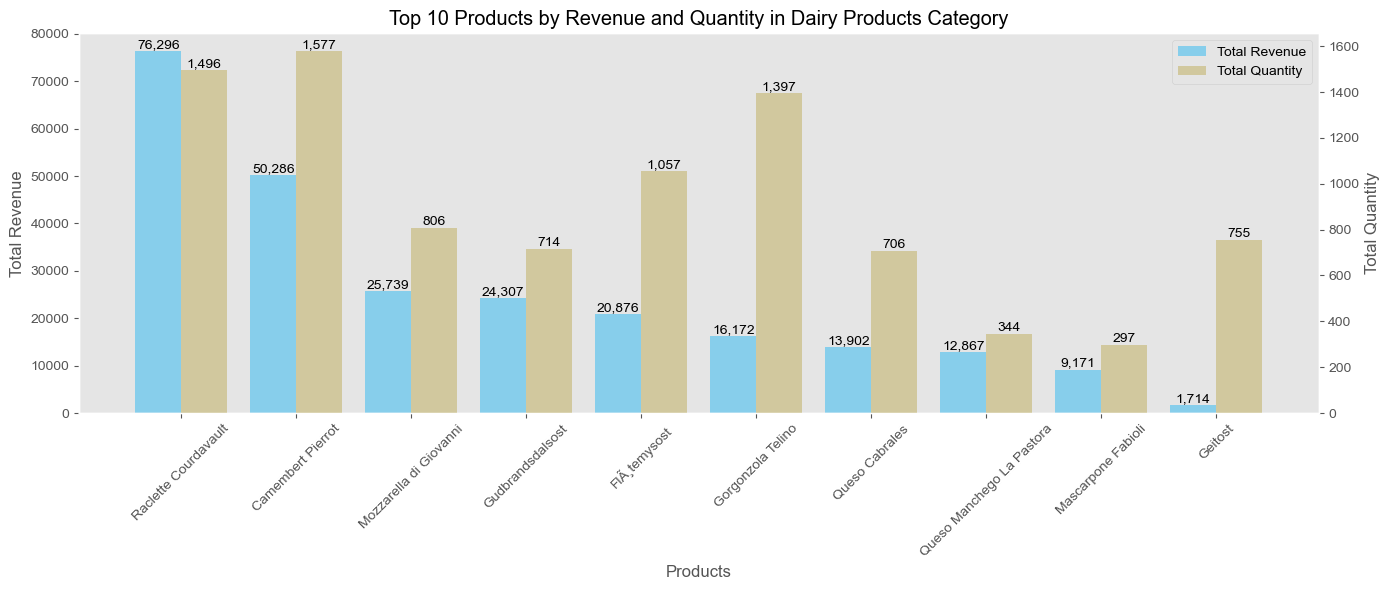

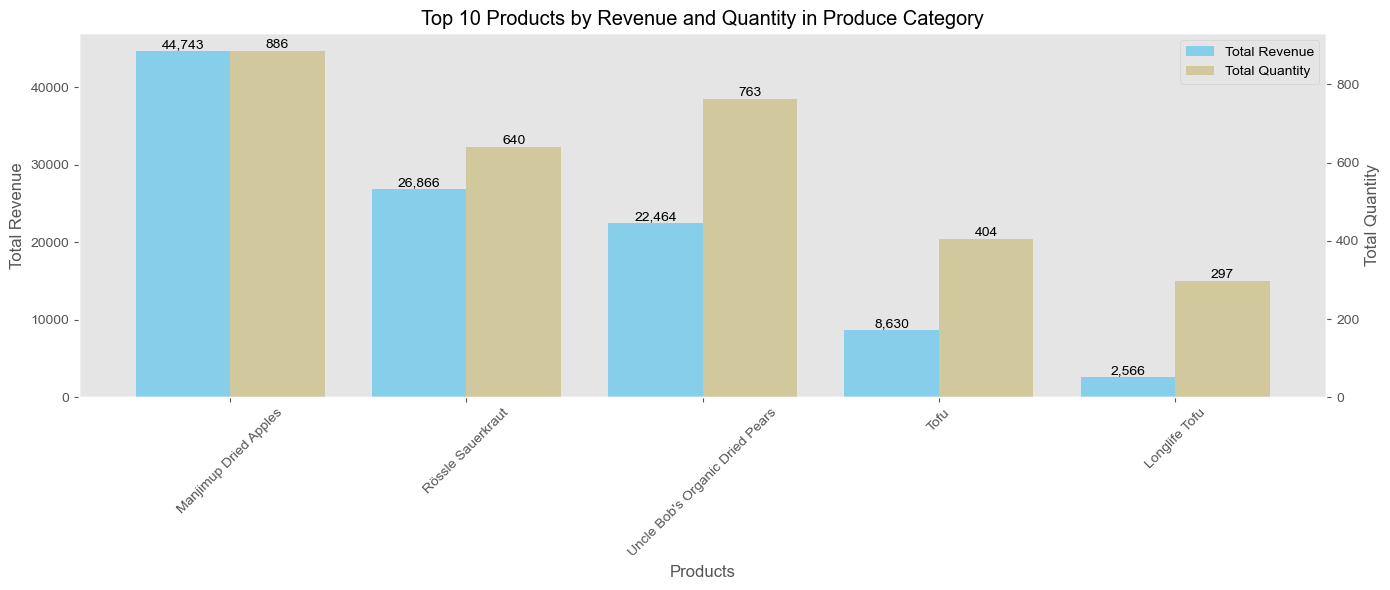

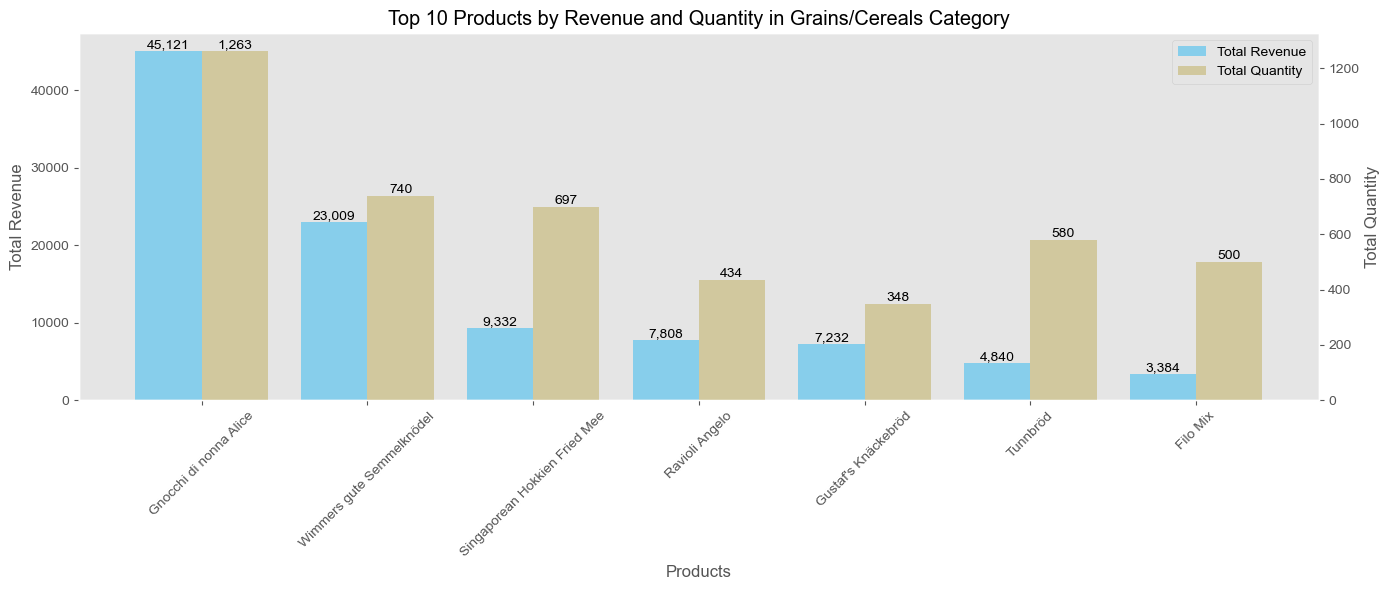

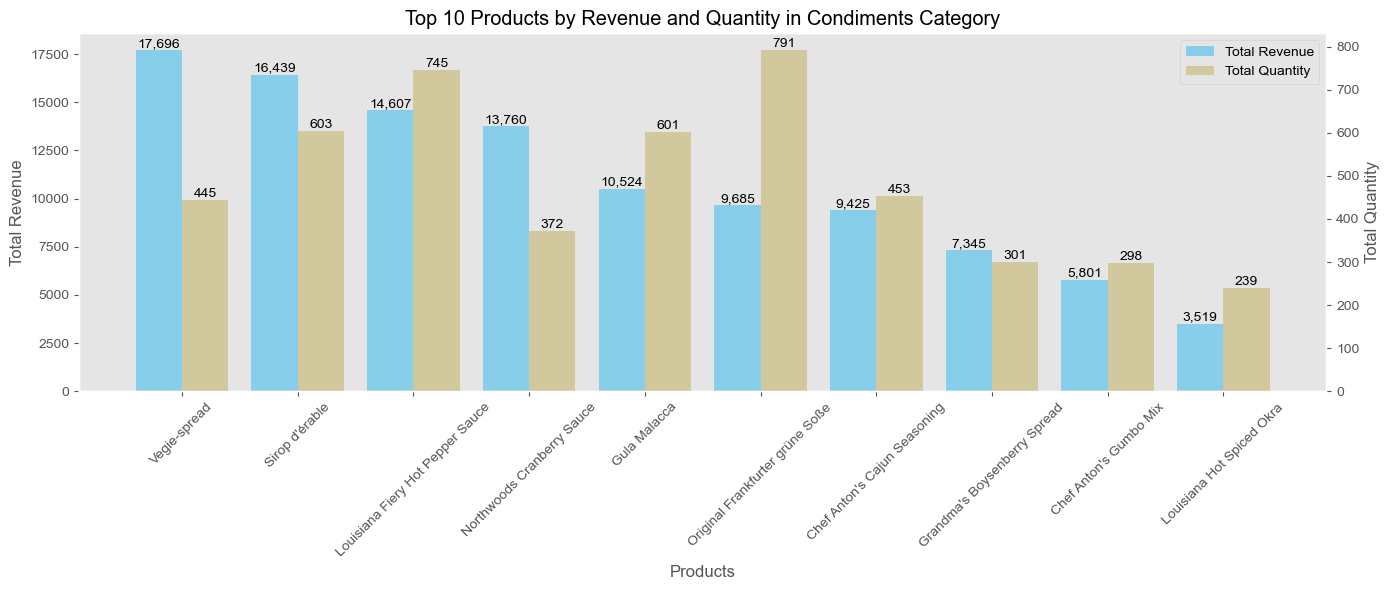

In [30]:


# Get unique categories
categories = products_analysis['CategoryName'].unique()

# Loop over each category
for category in categories:
    # Filter the dataframe for the current category
    category_data = products_analysis[products_analysis['CategoryName'] == category]
    
    # Group by ProductName and sum both TotalSales and Quantity
    top_products = (category_data.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                    .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                    .reset_index()
                    .sort_values("Total Revenue", ascending=False)
                    .head(10)
    )

    # Define positions for the clustered bars
    bar_width = 0.4
    index = np.arange(len(top_products['ProductName']))

    # Plot sales performance
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Main y-axis (left) for TotalSales
    bars1 = ax1.bar(index - bar_width/2, top_products['Total Revenue'], bar_width, color='skyblue', label='Total Revenue')

    # Add values on top of the bars for TotalSales
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax1.set_xlabel('Products')
    ax1.set_ylabel('Total Revenue')
    ax1.set_title(f'Top 10 Products by Revenue and Quantity in {category} Category')
    ax1.set_xticks(index)
    ax1.set_xticklabels(top_products['ProductName'], rotation=45)

    # Remove grid lines
    ax1.grid(False)

    # Secondary y-axis (right) for Quantity
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width/2, top_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

    # Add values on top of the bars for Quantity
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax2.set_ylabel('Total Quantity')

    # Remove grid lines
    ax2.grid(False)

    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()


### Task 2.1
### Bottom 10 Overall Products by Revenue
__Objective__:
To identify the bottom products contributing the least to total revenue helping the business understand which products are underperforming financially.


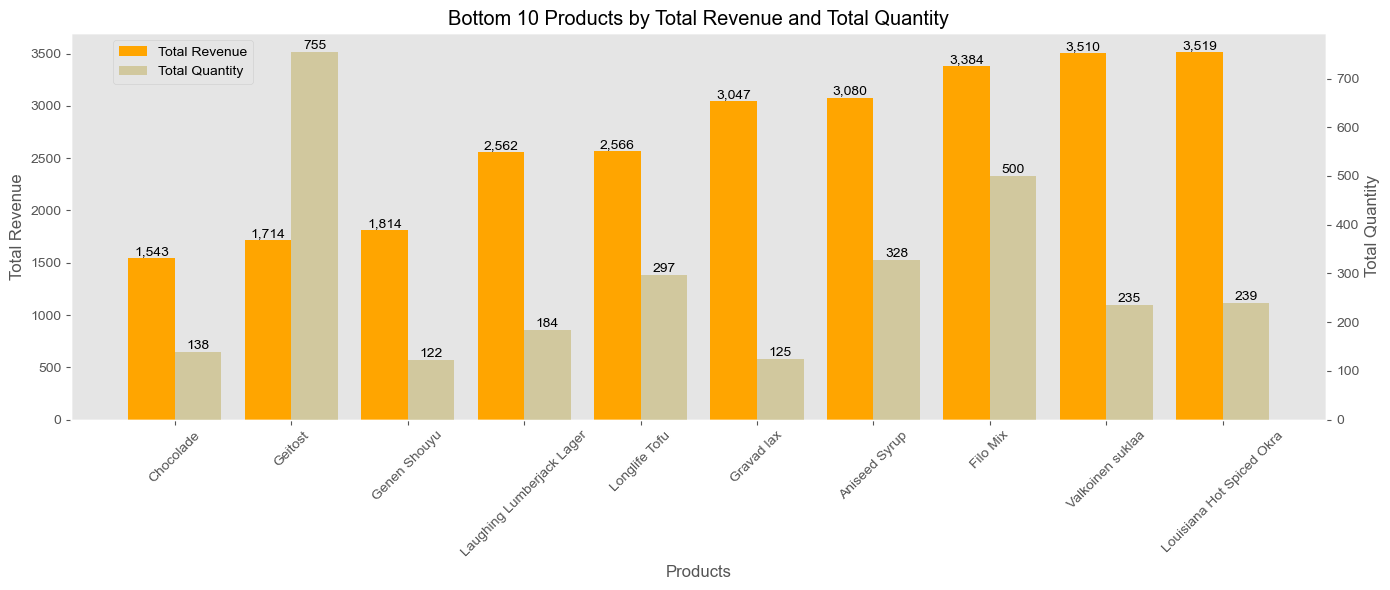

In [37]:


# Group by ProductName and sum both TotalSales and Quantity
bottom_products = (products_analysis.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                .reset_index()
                .sort_values("Total Revenue")
                .head(10)
)

# Define positions for the clustered bars
bar_width = 0.4
index = np.arange(len(bottom_products['ProductName']))

# Plot sales performance
fig, ax1 = plt.subplots(figsize=(14, 6))

# Main y-axis (left) for TotalSales
bars1 = ax1.bar(index - bar_width/2, bottom_products['Total Revenue'], bar_width, color='orange', label='Total Revenue')

# Add values on top of the bars for TotalSales
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax1.set_xlabel('Products')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Bottom 10 Products by Total Revenue and Total Quantity')
ax1.set_xticks(index)
ax1.set_xticklabels(bottom_products['ProductName'], rotation=45)

# Remove grid lines
ax1.grid(False)

# Secondary y-axis (right) for Quantity
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, bottom_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

# Add values on top of the bars for Quantity
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax2.set_ylabel('Total Quantity')

# Remove grid lines
ax2.grid(False)

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(.15,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


___________
### Bottom 10 Products by Revenue for each Category

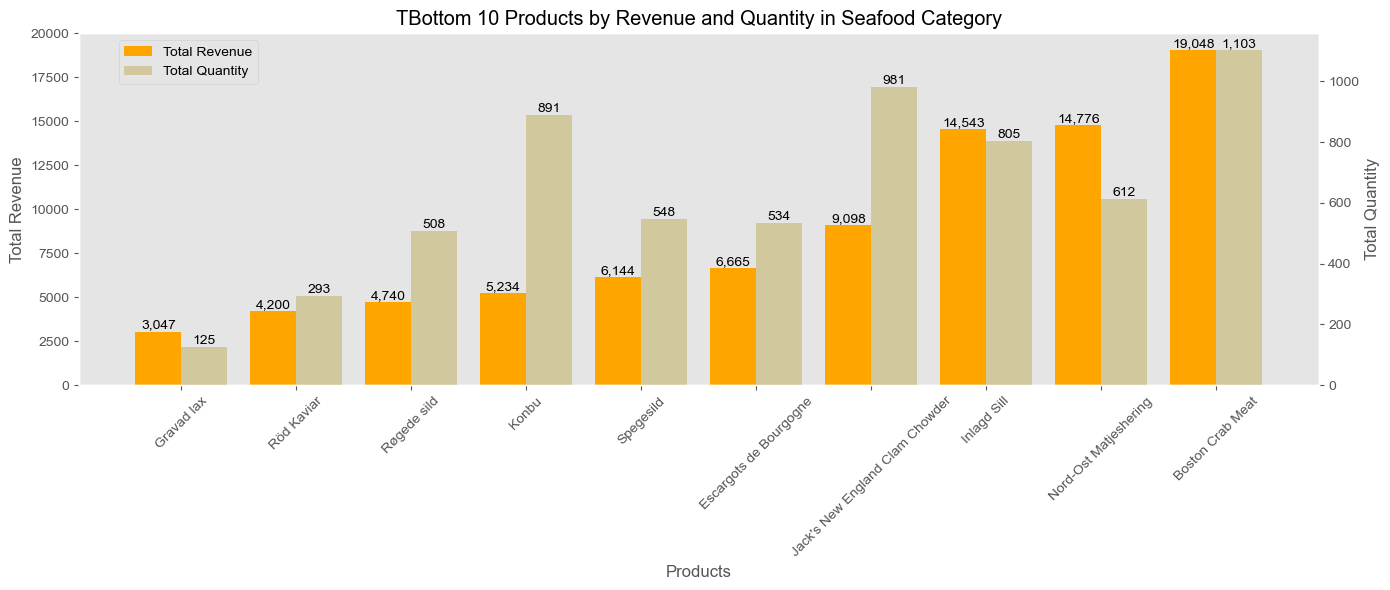

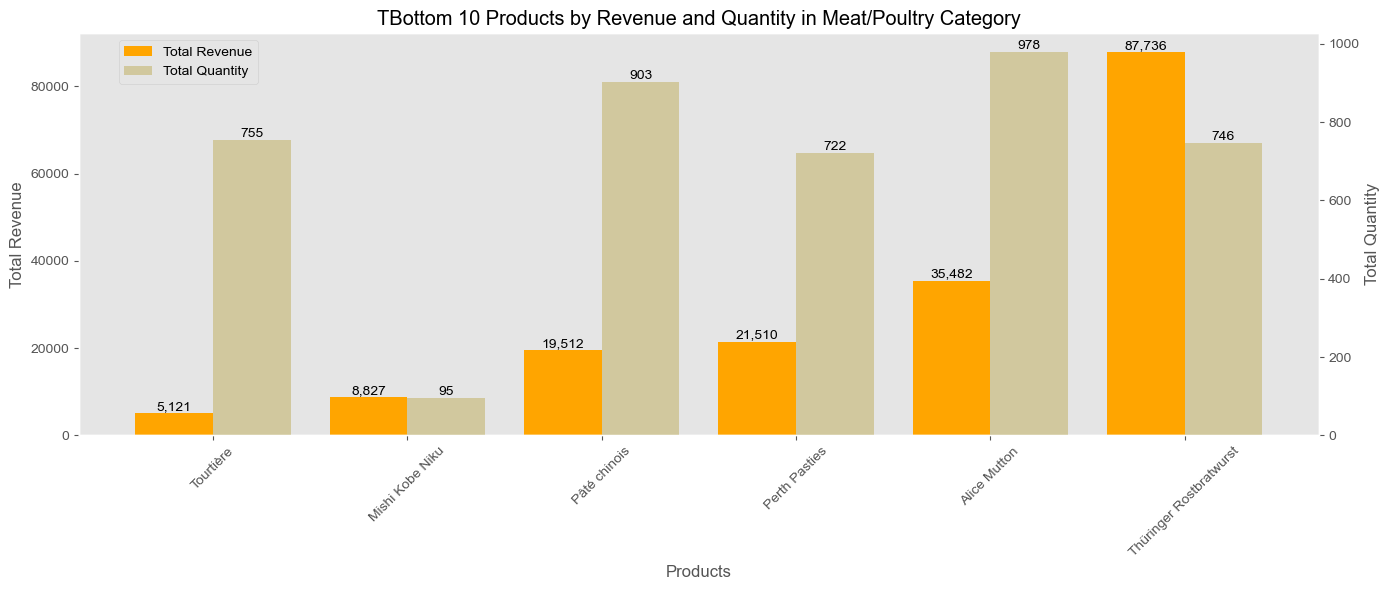

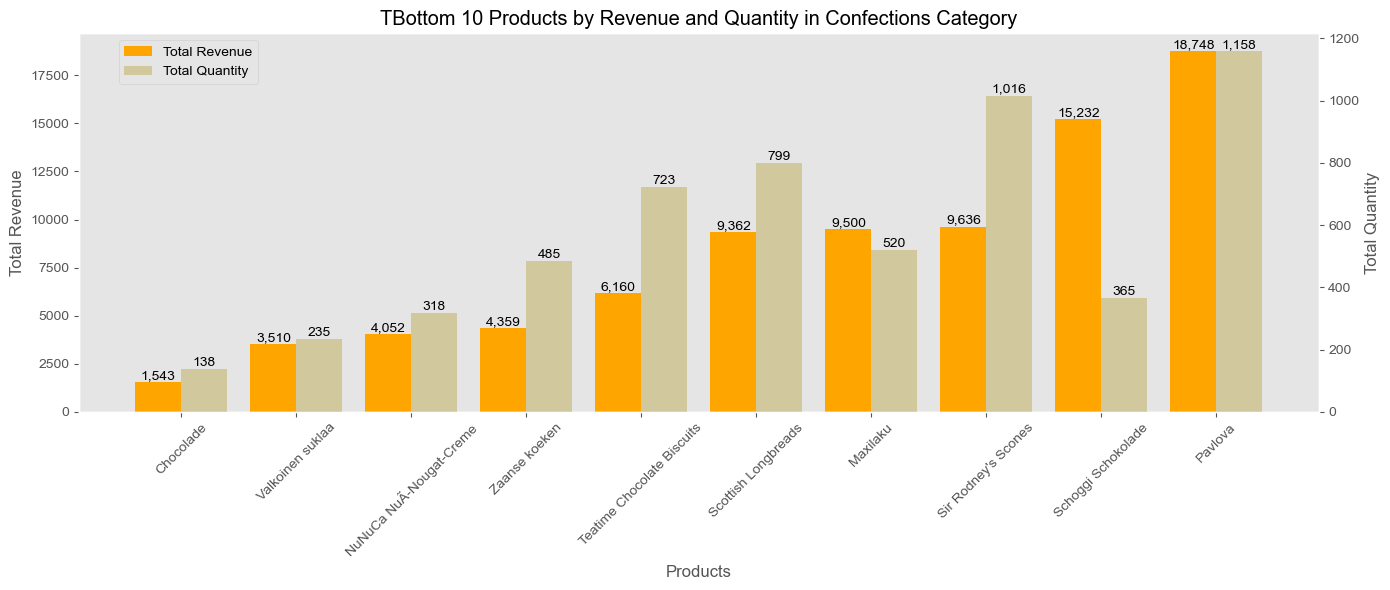

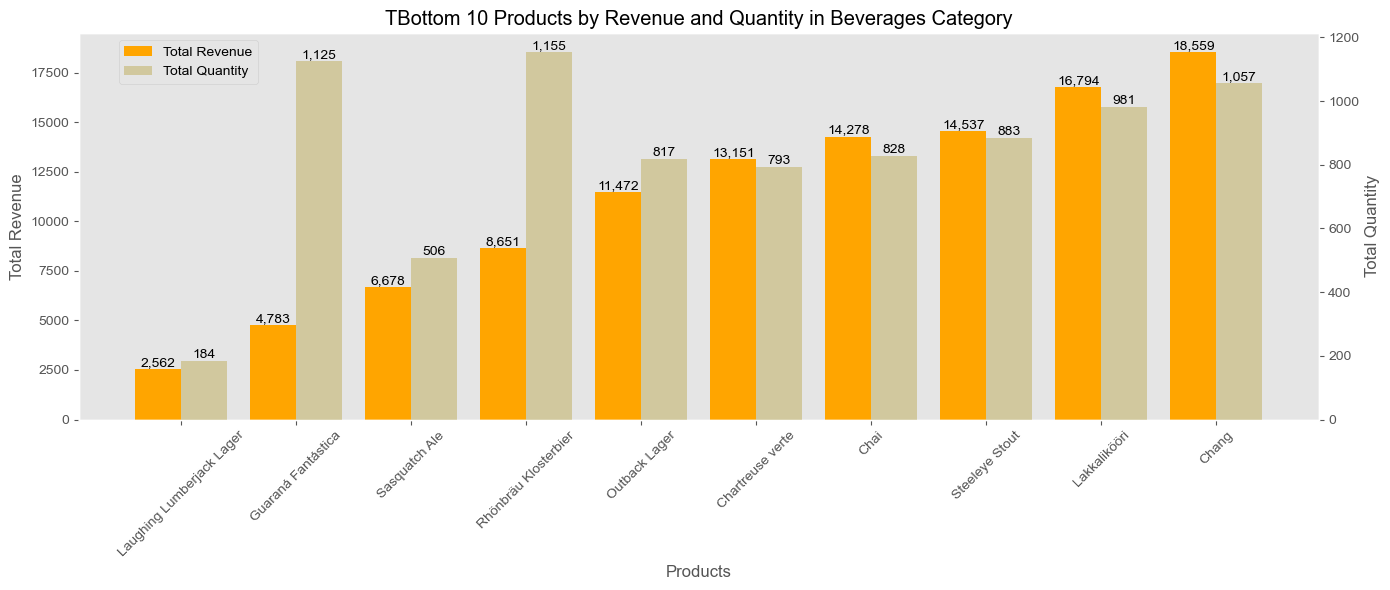

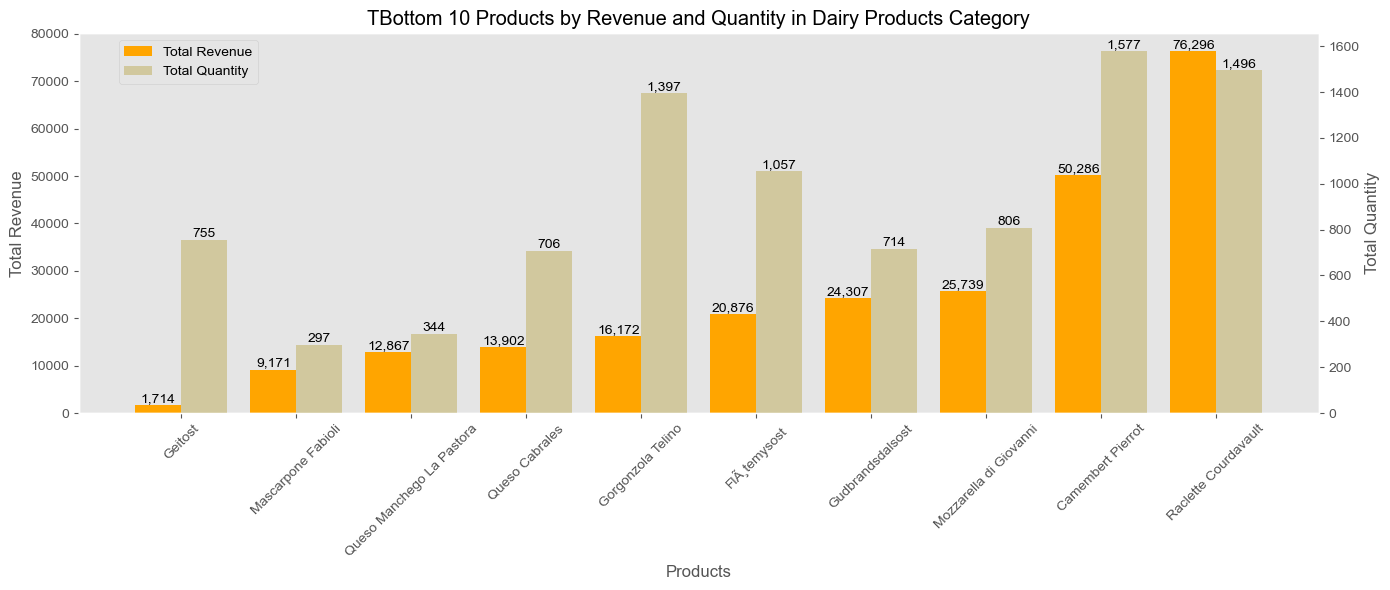

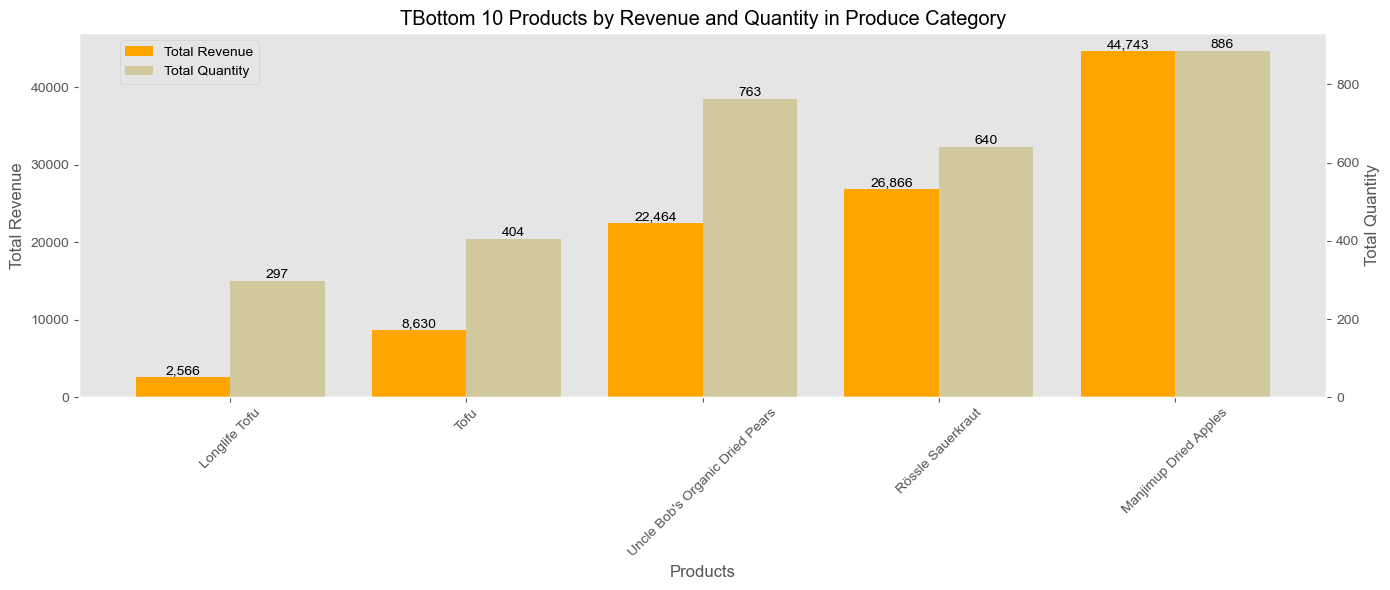

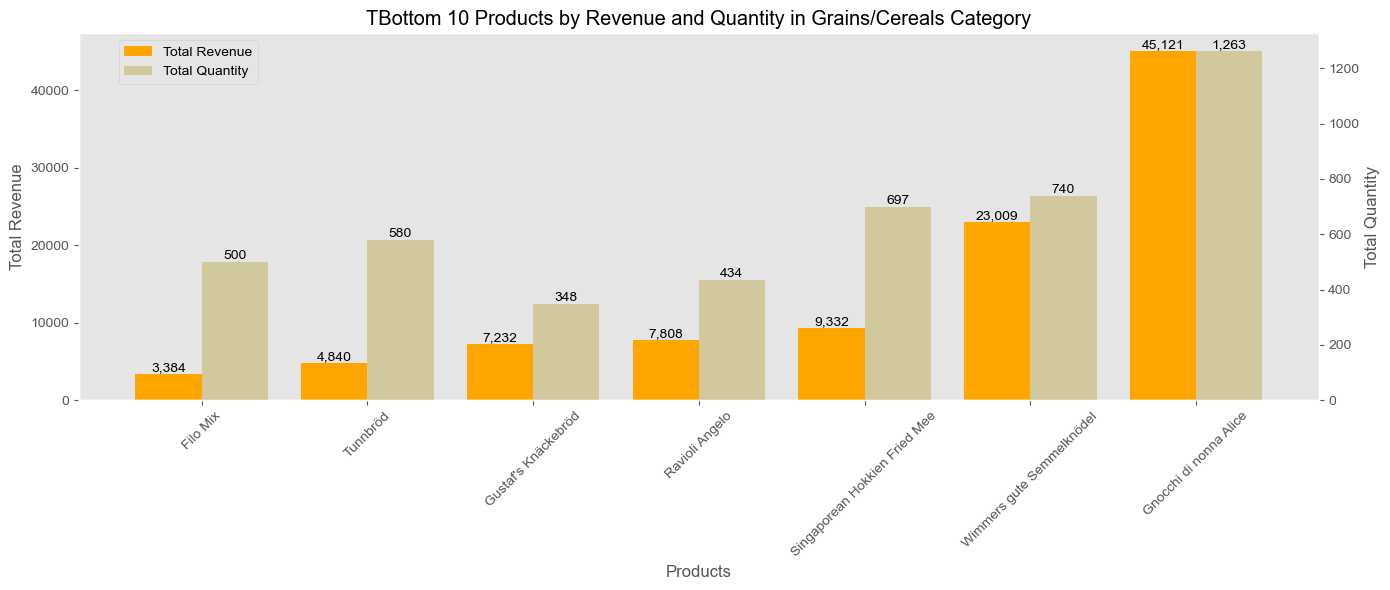

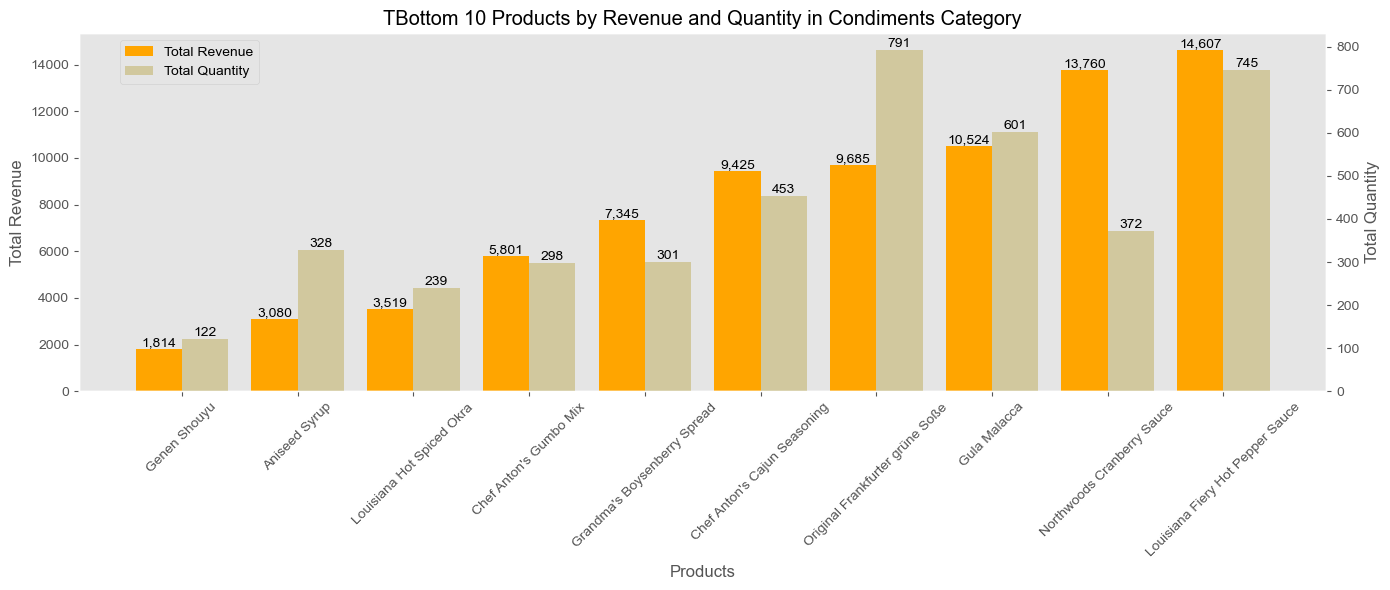

In [40]:


# Get unique categories
categories = products_analysis['CategoryName'].unique()

# Loop over each category
for category in categories:
    # Filter the dataframe for the current category
    category_data = products_analysis[products_analysis['CategoryName'] == category]
    
    # Group by ProductName and sum both TotalSales and Quantity
    bottom_products = (category_data.groupby('ProductName')[['Revenue', 'Quantity']].sum()
                    .rename({"Revenue":"Total Revenue","Quantity":"Total Quantity"}, axis=1)
                    .reset_index()
                    .sort_values("Total Revenue")
                    .head(10)
    )

    # Define positions for the clustered bars
    bar_width = 0.4
    index = np.arange(len(bottom_products['ProductName']))

    # Plot sales performance
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Main y-axis (left) for TotalSales
    bars1 = ax1.bar(index - bar_width/2, bottom_products['Total Revenue'], bar_width, color='orange', label='Total Revenue')

    # Add values on top of the bars for TotalSales
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax1.set_xlabel('Products')
    ax1.set_ylabel('Total Revenue')
    ax1.set_title(f'TBottom 10 Products by Revenue and Quantity in {category} Category')
    ax1.set_xticks(index)
    ax1.set_xticklabels(bottom_products['ProductName'], rotation=45)

    # Remove grid lines
    ax1.grid(False)

    # Secondary y-axis (right) for Quantity
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width/2, bottom_products['Total Quantity'], bar_width, color='#c4b670', alpha=0.6, label='Total Quantity')

    # Add values on top of the bars for Quantity
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax2.set_ylabel('Total Quantity')

    # Remove grid lines
    ax2.grid(False)

    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(.15,1), bbox_transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()


In [82]:
top_product_names

['Côte de Blaye',
 'Thüringer Rostbratwurst',
 'Raclette Courdavault',
 'Camembert Pierrot',
 'Tarte au sucre',
 'Gnocchi di nonna Alice',
 'Manjimup Dried Apples',
 'Alice Mutton',
 'Carnarvon Tigers',
 'Rössle Sauerkraut']

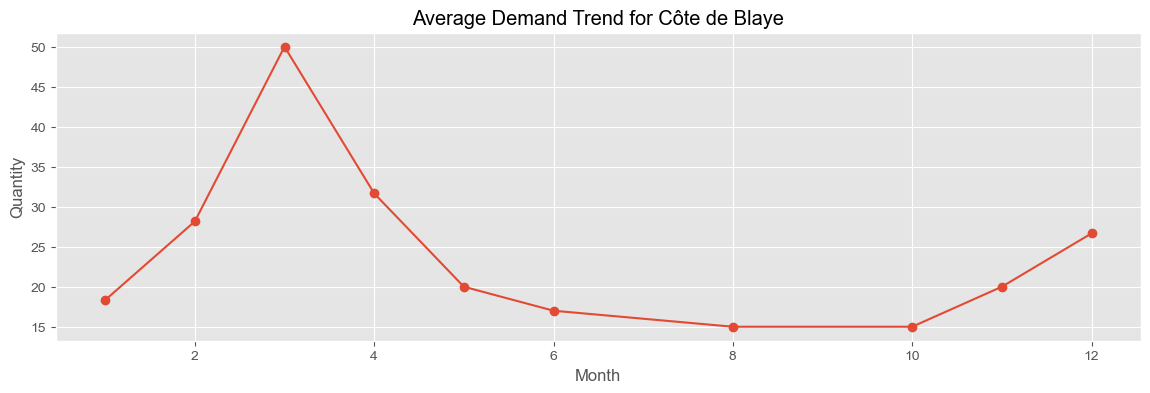

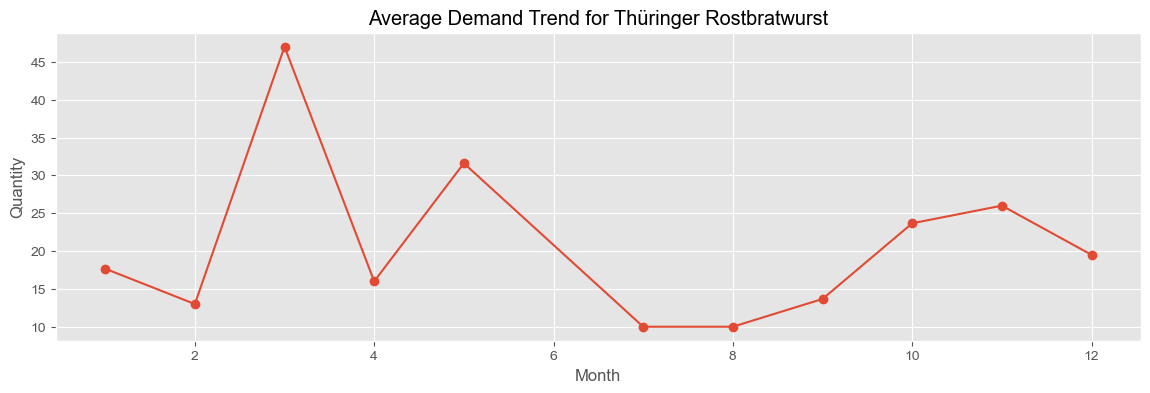

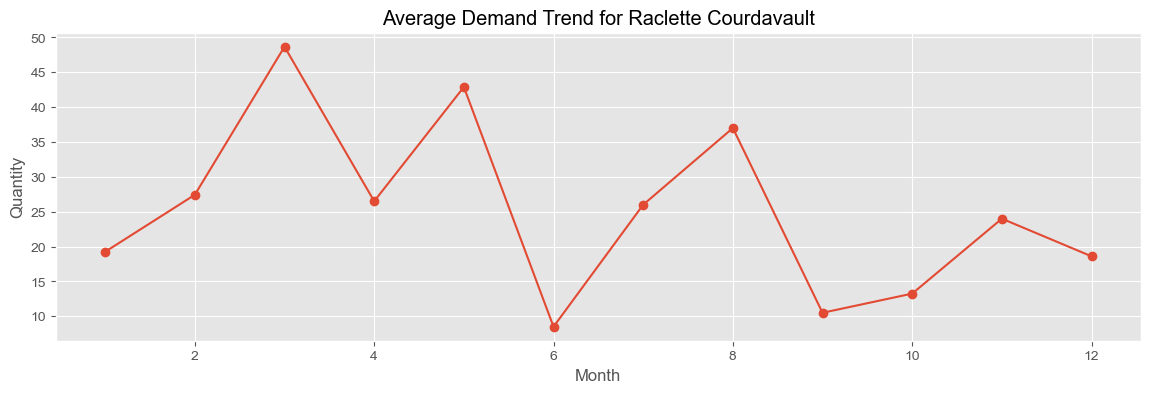

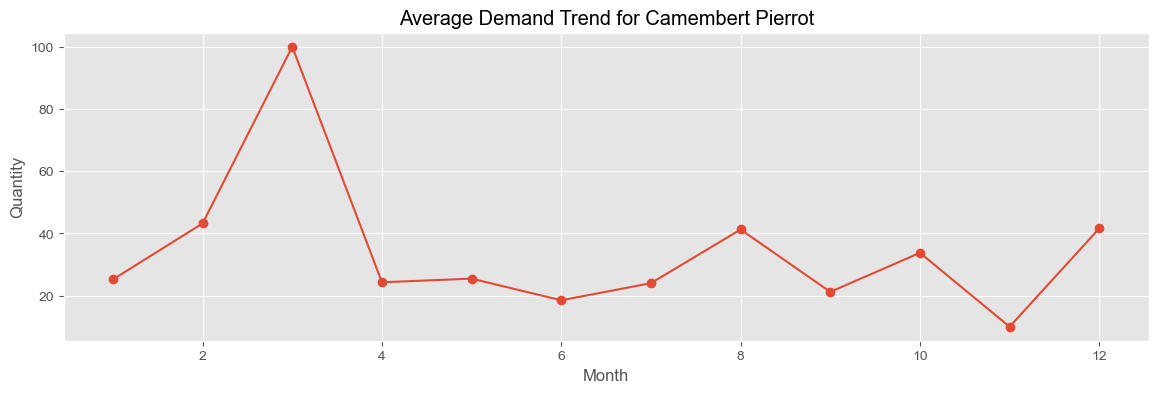

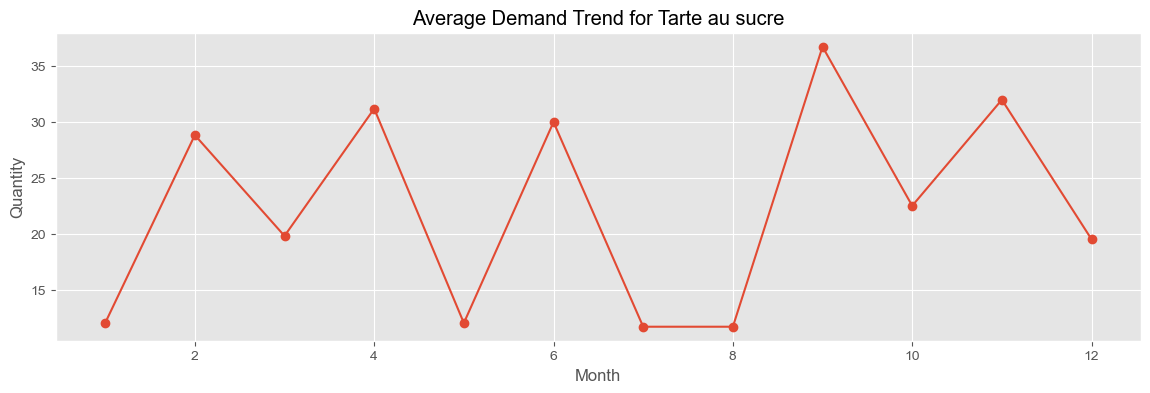

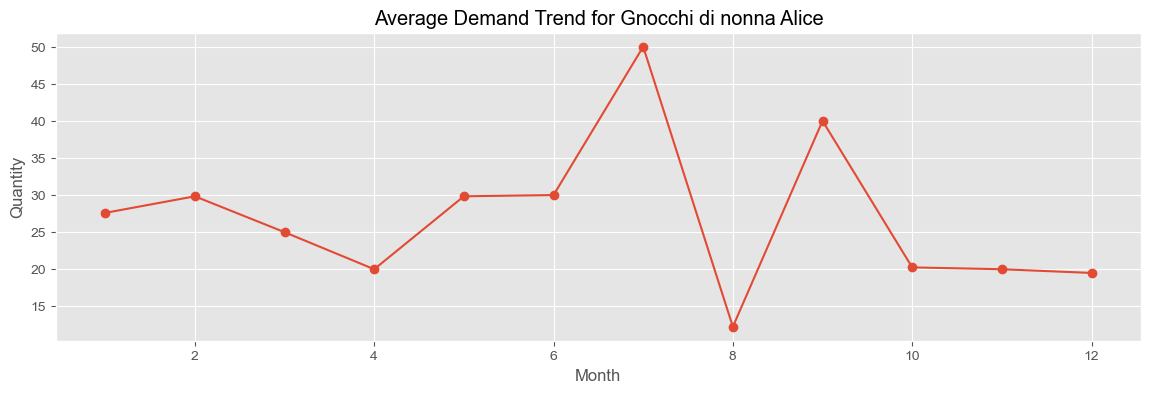

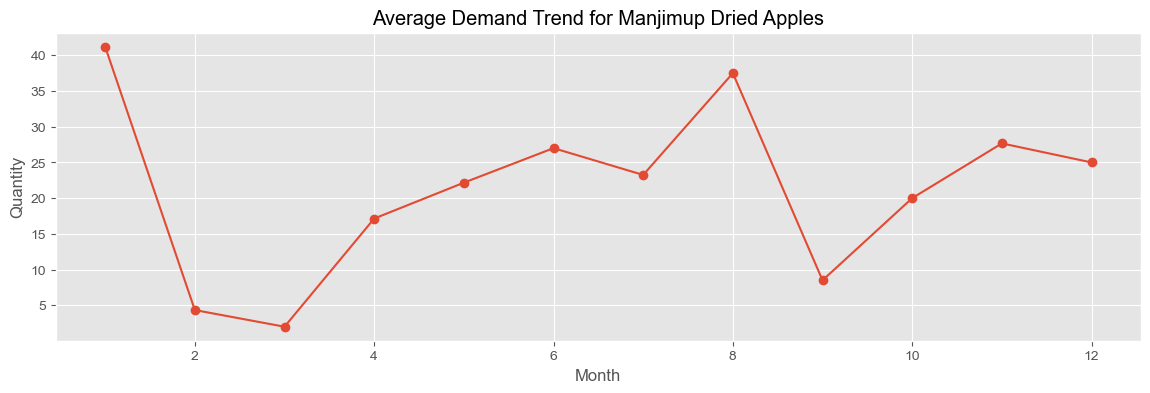

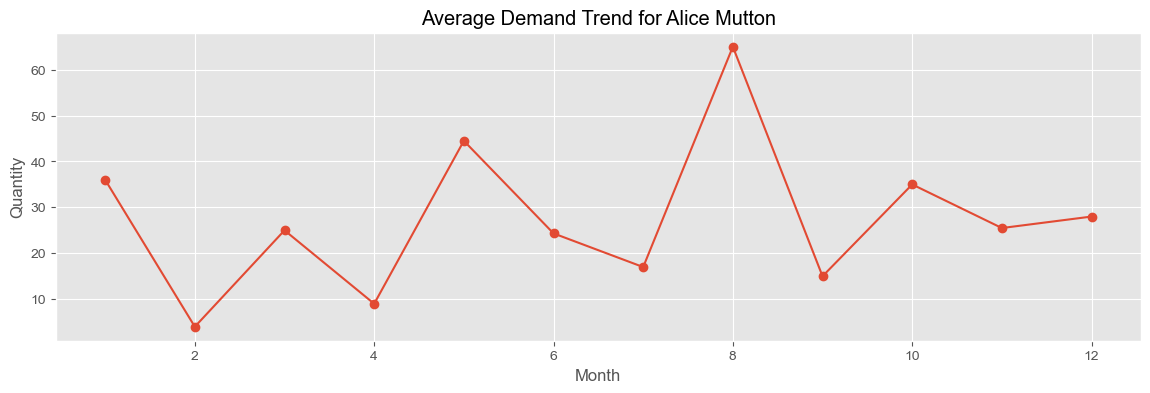

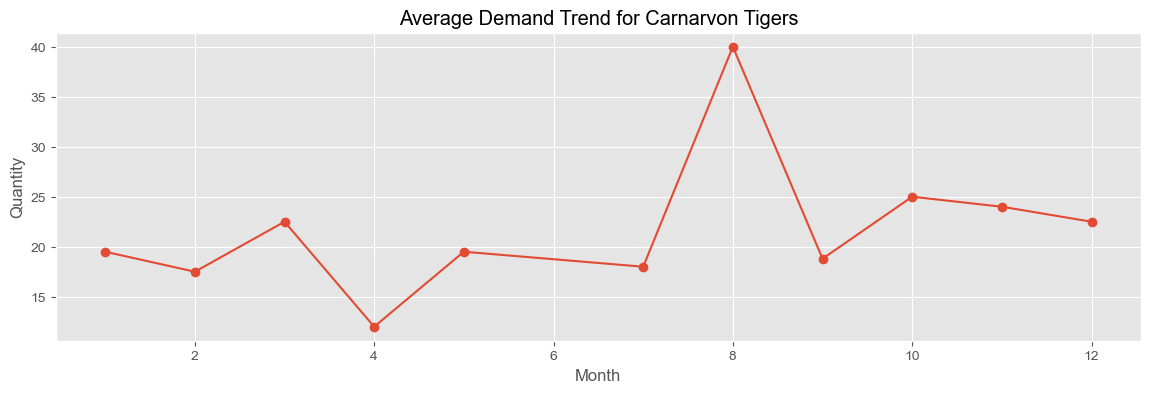

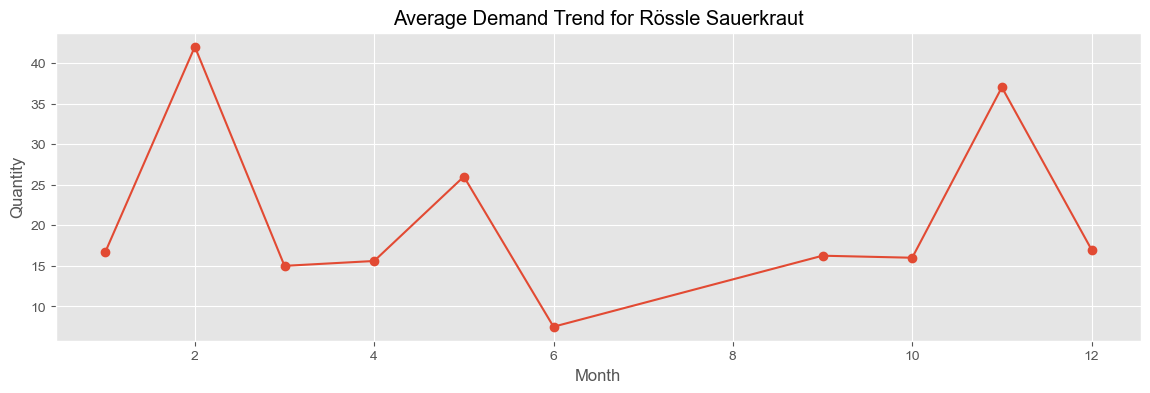

In [83]:
top_product_names = (products_analysis.groupby('ProductName')['Revenue'].sum()
                .reset_index()
                .rename({"Revenue":"Total Revenue"}, axis=1)
                .sort_values("Total Revenue", ascending=False)
                .head(10)
)["ProductName"].tolist()

filtered_data = products_analysis[products_analysis['ProductName'].isin(top_product_names)]

demand_trends = (filtered_data.groupby([filtered_data["OrderDate"].dt.month, 'ProductName'])['Quantity']
                 .mean()
                 .to_frame()
                 .reset_index()
                 .rename({"OrderDate":"Month"}, axis=1)
                 )#.unstack().fillna(0)

# Get unique product names
# product_names = demand_trends['ProductName'].unique()

# loop over the top products name
for product in top_product_names:
    product_data = demand_trends[demand_trends['ProductName'] == product]
    
    # Plot line chart for each product
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.plot(product_data['Month'], product_data['Quantity'], marker='o')
    
    # Add labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
    ax.set_title(f'Average Demand Trend for {product}')
    ax.grid(True)
    
    # Show plot
    plt.show()

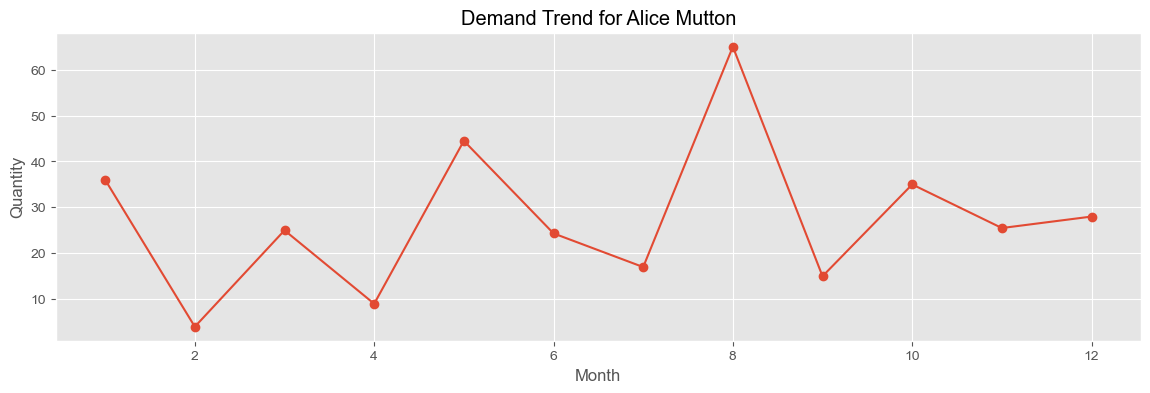

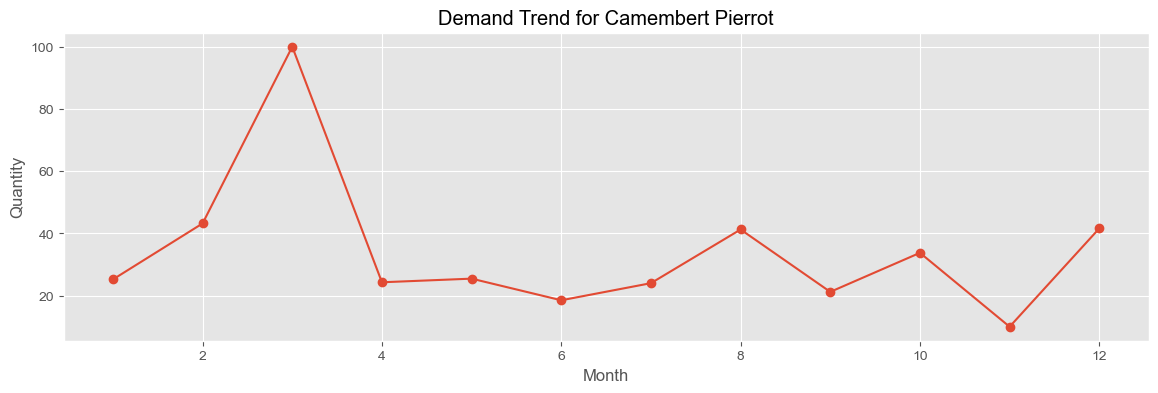

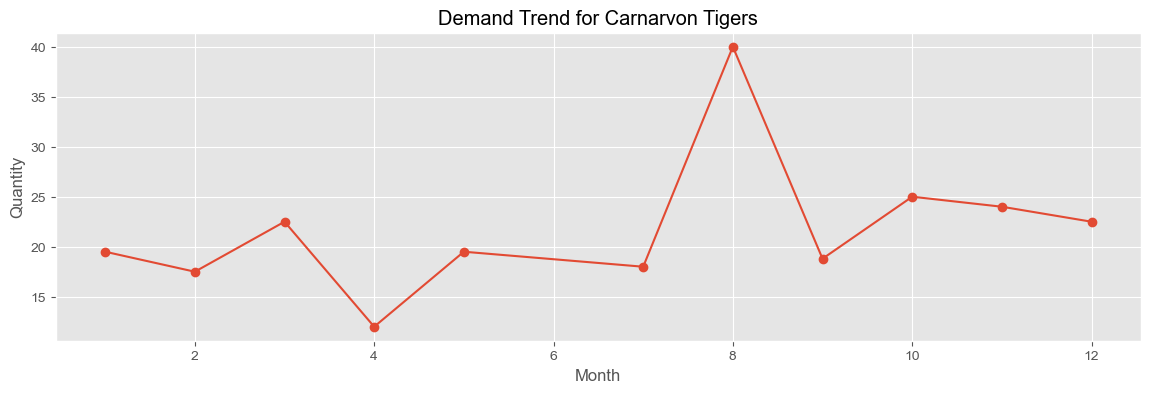

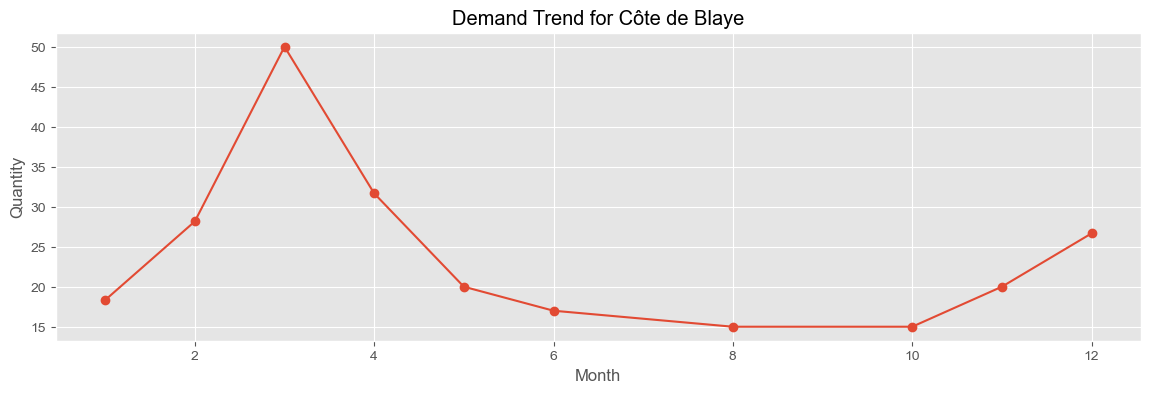

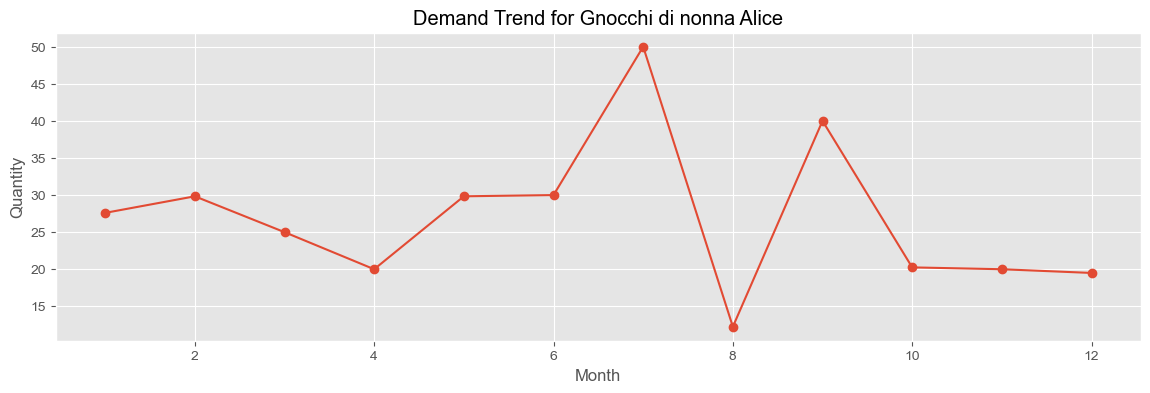

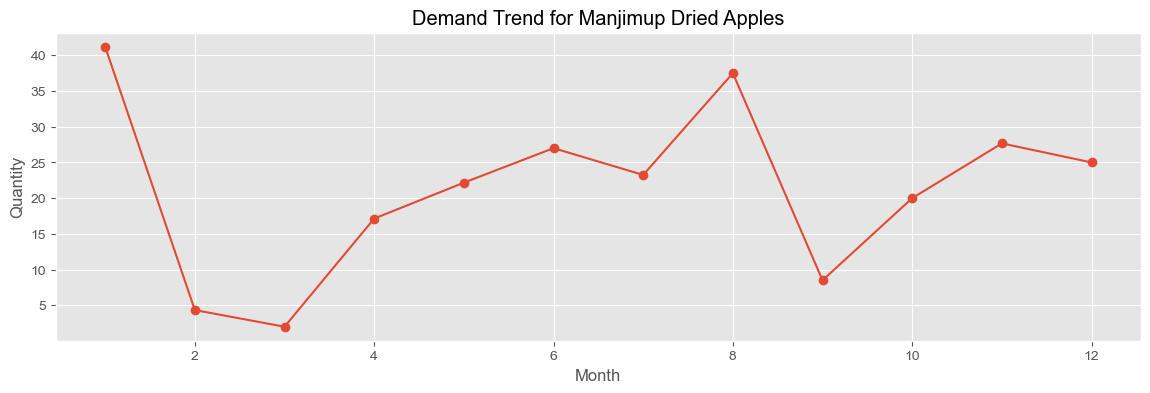

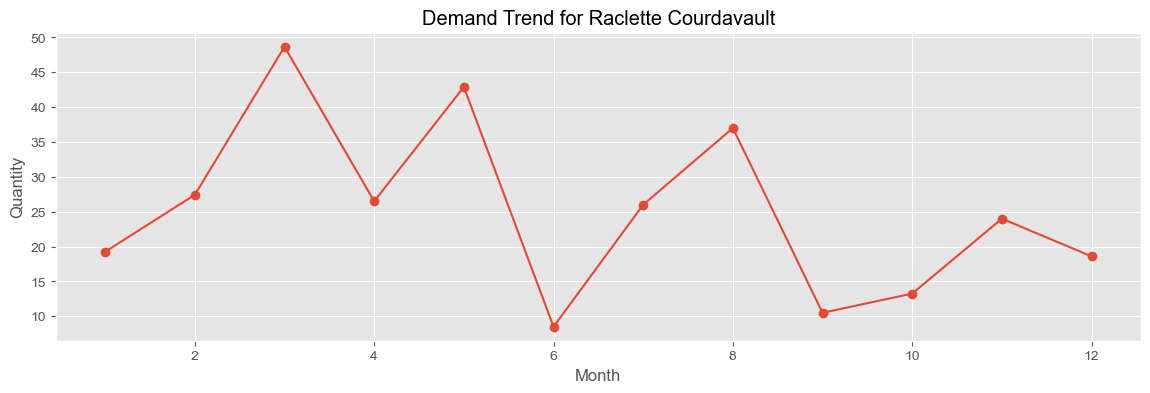

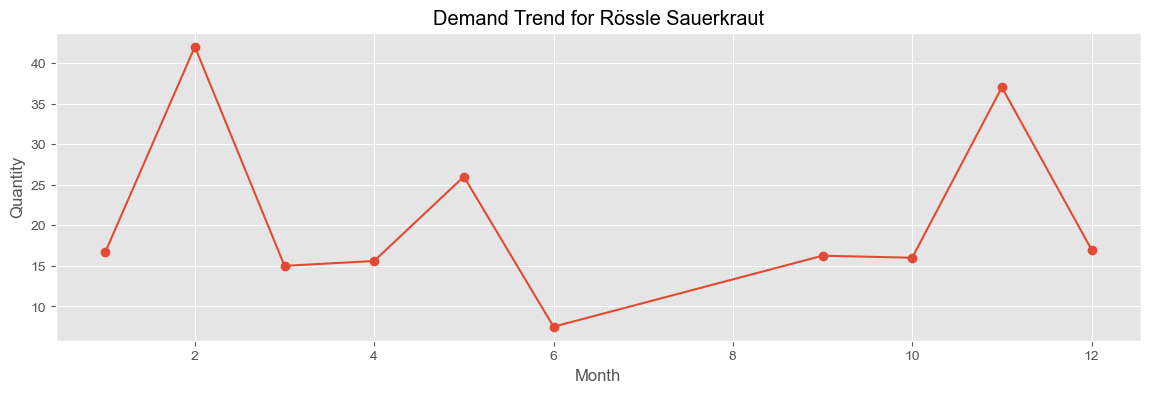

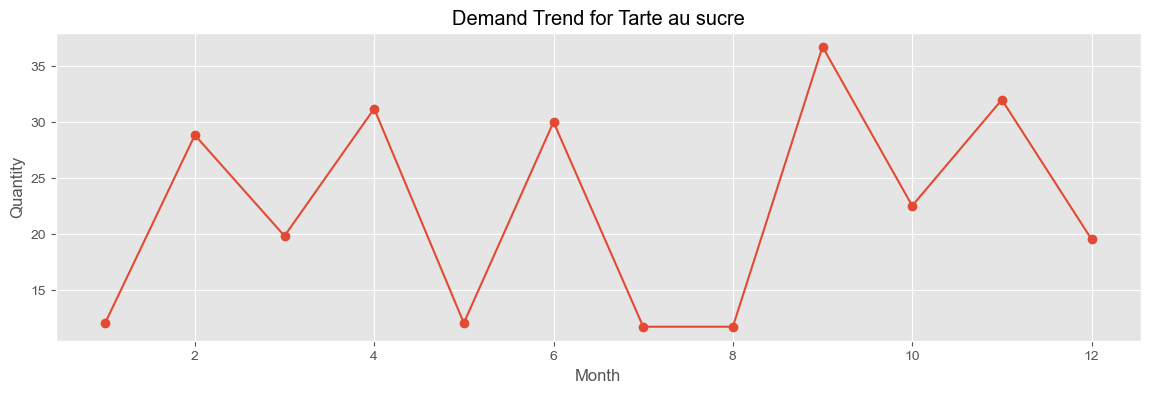

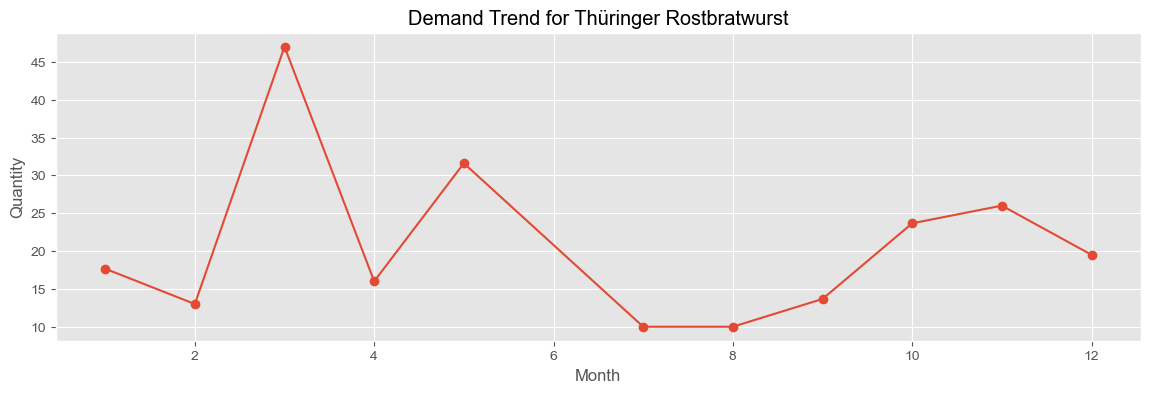

In [75]:


# Get unique product names
product_names = demand_trends['ProductName'].unique()

for product in product_names:
    product_data = demand_trends[demand_trends['ProductName'] == product]
    
    # Plot line chart for each product
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.plot(product_data['Month'], product_data['Quantity'], marker='o')
    
    # Add labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
    ax.set_title(f'Demand Trend for {product}')
    ax.grid(True)
    
    # Show plot
    plt.show()
